# Loan Prediciton Problem
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
Problem:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Introduction,
    After gaining the basic  knowledge in Python and Machine learning, I decided to work on real data set. I used Analytic vidhya Python tutorial to work on this problem set. I have explored this data set and build machine learning model and measured the performance. This Notebook includes
    1. Importing the data set
    2. Visualized and analysed the continous and categorical features
    3. Data Munging 
    4. Handling the extreme values(outliers) in data set
    5.Building the model
    
   

# 1.Importing the data set

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
data=pd.read_csv("train_loan.csv")

In [79]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [80]:
X=data[[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']].fillna(0)
      

In [81]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,0.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


# 2. Analyzing and Visualzing Continuous and categorical variables

In [82]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [84]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [85]:
data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [86]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [87]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

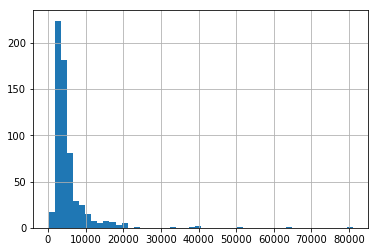

In [88]:
#Univariat Analysis using histogram
#Understand the distribution particular data
data.ApplicantIncome.hist(bins=50)

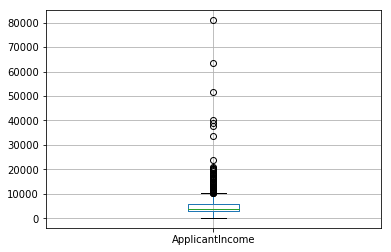

In [89]:
#There are extreme cases in distribution that can be attribute to income disparities in society
#box plot is used to study about distribution of data and find outliers
data.boxplot(column="ApplicantIncome")

In [90]:
data[["ApplicantIncome","Education"]].groupby(["Education"]).median()

,ApplicantIncome
Education,
Graduate,4000.0
Not Graduate,3357.5


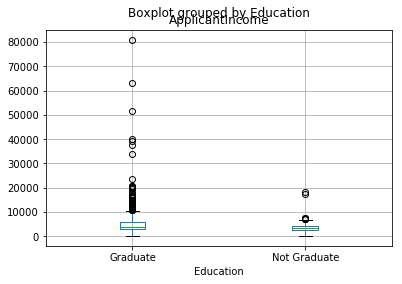

In [91]:
data.boxplot(column="ApplicantIncome",by="Education")

In [92]:
data[["ApplicantIncome","Gender"]].groupby(["Gender"]).median()

,ApplicantIncome
Gender,
Female,3583
Male,3865


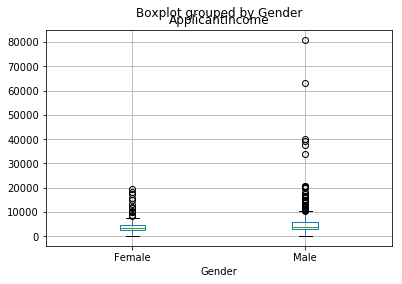

In [93]:
data.boxplot(column="ApplicantIncome",by="Gender")

The extreme cases are not only due to income disparities in gender and graduate . it's due to presence of outliers'
There is no substantial difference in median income between graduates and non graduate. There are large number of graduates earns higher income. That's the reason for outlier

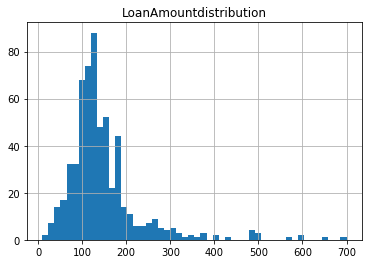

In [94]:
data.LoanAmount.hist(bins=50)
plt.title("LoanAmountdistribution")

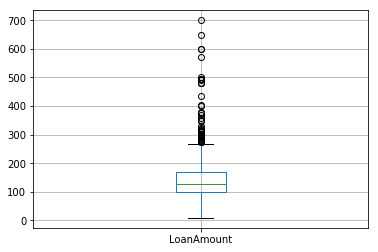

In [95]:
data.boxplot(column='LoanAmount')

There are extreme cases in loan Amount and missing data where as Apoplicant Income has extreme value. Both of these needs data cleaning.


In [96]:
data[["Credit_History","Gender"]].groupby(['Credit_History','Gender']).size()

Credit_History  Gender
0.0             Female     17
                Male       69
1.0             Female     84
                Male      382
dtype: int64

There are large no of males have credit-History than female, whereas higher no of females has no credit_history than male.

In [97]:
#Now will explore loan_granted with credit_history
temp1=data.pivot_table(values='Loan_Status',index=["Credit_History"],aggfunc=lambda X : X.map({'Y':1,'N':0}).mean())

Therefore customer who have higher credit history have higher propability for loans to be granted 

In [98]:
temp1

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [99]:
temp2=data.Credit_History.value_counts()

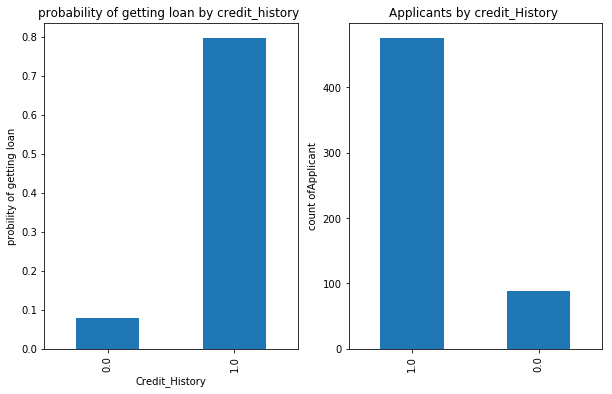

In [100]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(121)
temp1.plot(kind="bar")
ax1.set_title("probability of getting loan by credit_history ")
ax1.set_ylabel("probility of getting loan")
ax2=fig.add_subplot(122)
temp2.plot(kind="bar")
ax2.set_title("Applicants by credit_History ")
ax2.set_ylabel("count ofApplicant")


In [154]:
temp1=data.pivot_table(values="Loan_Status",index="Education",aggfunc=lambda X : X.map({'Y':1,'N':0}).mean())

In [102]:
temp2=data.pivot_table(values="Loan_Status",index="Gender",aggfunc=lambda X: X.map({'Y':1,'N':0}).mean())

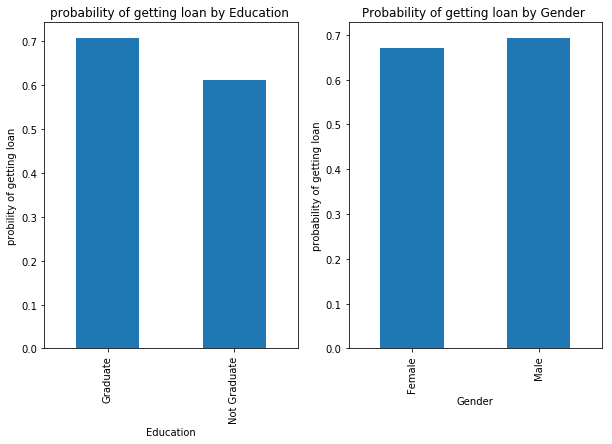

In [103]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(121)
temp1.plot(kind="bar")
ax1.set_title("probability of getting loan by Education ")
ax1.set_ylabel("probility of getting loan")
ax2=fig.add_subplot(122)
temp2.plot(kind="bar")
ax2.set_title("Probability of getting loan by Gender ")
ax2.set_ylabel("probability of getting loan")


Graduate have higher probability of geeting loan than Not Graduated customer.
But there is no substantial diifference between probability of geeting loan by gender

In [104]:
temp1=data.pivot_table(values="ApplicantIncome",index="Gender")

In [105]:
temp1

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

In [106]:
temp1=data.pivot_table(values="Loan_Status",index="Self_Employed",aggfunc=lambda X : X.map({'Y':1,'N':0}).mean())

In [107]:
temp2=data.pivot_table(values="Loan_Status",index="Married",aggfunc=lambda X : X.map({'Y':1,'N':0}).mean())

In [108]:
temp3= data.pivot_table(values="Loan_Status",index="Property_Area",aggfunc=lambda X:X.map({'Y':1,"N":0}).mean())
temp3

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64

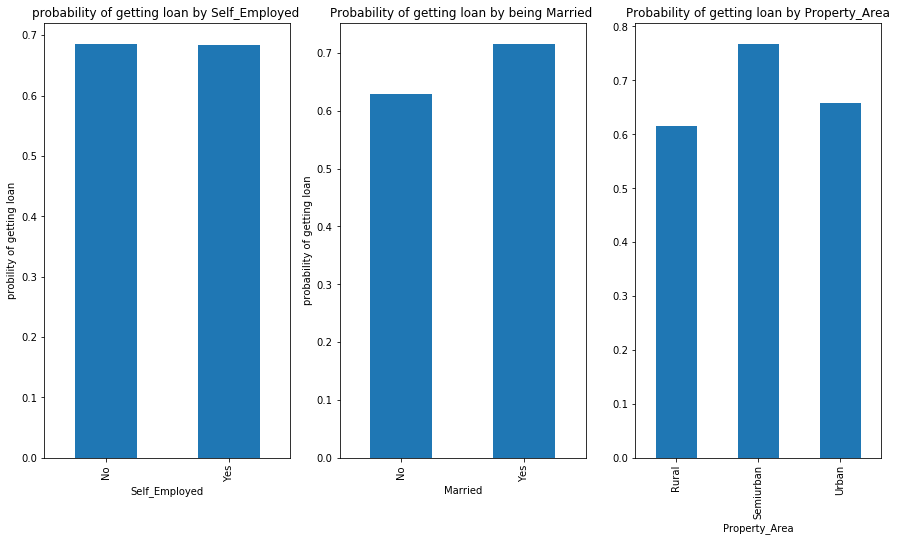

In [109]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(131)
temp1.plot(kind="bar")
ax1.set_title("probability of getting loan by Self_Employed ")
ax1.set_ylabel("probility of getting loan")
ax2=fig.add_subplot(132)
temp2.plot(kind="bar")
ax2.set_title("Probability of getting loan by being Married ")
ax2.set_ylabel("probability of getting loan")
ax3=fig.add_subplot(133)
temp3.plot(kind="bar")
ax3.set_title("Probability of getting loan by Property_Area")


Granting loan is not affected by self_Employed. Higher propability of getting Loan if property_Area is SemiUrban than Rural and Urban. Bcoz the value of house loan in semi Urban would be lesser than urban and semi urban will grow lot faster than Urban which is already developed. So the bank has higher probability to offer loan to Applicant if he is buying house in semi-urban and he is married.

The Applicant loan status depends on following condition
If Applicant have credit History , Graduated and married  then he will  most likely get his loan


In [110]:
#Stacked Bar
temp1=pd.crosstab(data["Credit_History"],data["Loan_Status"])

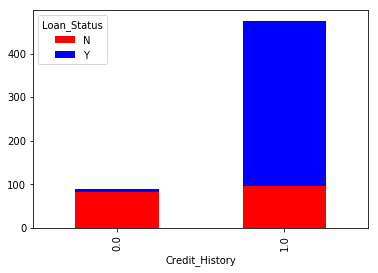

In [111]:
temp1.plot(kind='bar',stacked="True",color=["red","blue"])

In [112]:
temp1

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [113]:
temp2=pd.crosstab(index=data["Loan_Status"],columns=[data["Credit_History"],data["Gender"]])

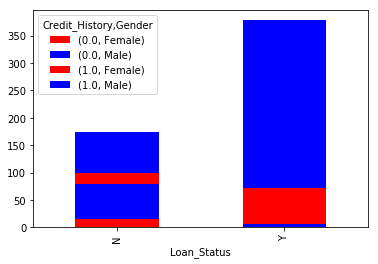

In [114]:
temp2.plot(kind="bar",stacked="True",color=["red","blue"])

In [115]:
temp3=pd.crosstab(index=data['Loan_Status'],columns=[data["Credit_History"],data["Gender"]])

In [116]:
temp3

Credit_History    0.0         1.0     
Gender         Female Male Female Male
Loan_Status                           
N                  16   63     20   75
Y                   1    6     64  307

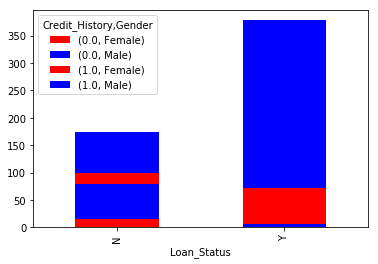

In [117]:
temp3.plot(kind="bar",stacked="True",color=["red","blue"])

 # 3. Data Munging - Filling missing value

In [118]:
#Find is there any missing value in data frame
data.apply(lambda X: sum(X.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

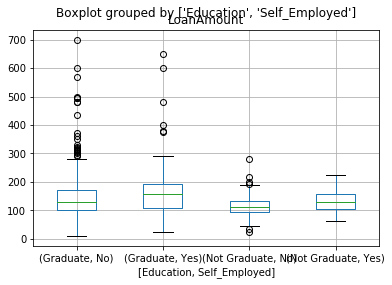

In [119]:
data.boxplot(column="LoanAmount",by=["Education","Self_Employed"])

Thus we see the variation in the median of loan amount. This can be used to impute the values.

In [120]:
#To ensure education and self employed should not have missing values
data["Self_Employed"].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

85% of Applicant is not self employed it make sense to replace missing value for self_Employed by "NO"

In [121]:
data["Self_Employed"].fillna(value="No",inplace=True)

# Filling missing values of Loan Amount

In [122]:
table=data.pivot_table(values="LoanAmount",index="Self_Employed",columns="Education",aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [123]:
#define function to return the value of pivot_table
def fage(X):
    return table.loc[X["Self_Employed"],X["Education"]]
#replace missing value
data["LoanAmount"].fillna(data[data.LoanAmount.isnull()].apply(fage,axis=1),inplace=True)

In [124]:
data.apply(lambda X : sum(X.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [126]:
data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In given data set 81% are male, so it make sense to replace Not known by Male

In [127]:
data["Gender"].fillna(value="Male",axis=0,inplace=True)

In [128]:
data.apply(lambda X: sum(X.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
data.pivot_table(values="Married",index="Gender",aggfunc=lambda X : X.map({"Yes":1,"No":0}).mean())

Gender
Female    0.279279
Male      0.734000
Name: Married, dtype: float64

In [130]:
pd.crosstab(index=data["Married"],columns=[data["Gender"]])

Gender,Female,Male
Married,,
No,80,133
Yes,31,367


In [131]:
row=data[["Gender","Married"]][data["Married"].isnull()]
row

,Gender,Married
104,Male,NaN
228,Male,NaN
435,Female,NaN


In given data set, 73% of Male are married and 72 % of female are unmarried which are higher than otherwise.It make sense to replace unkwoen values of Married column based on gender column.


In [132]:
#filling the rows of unknown values in Married column based on Gender using for loop
for i,j in row.iterrows():
    if(j["Gender"]=="Male"):
        data.loc[i,"Married"]="Yes"
    else :
        data.loc[i,"Married"]="No"
   
        
        
    


 Filling Missing value of Dependents?: Dependents feature in data is irrelevant for prediction, so will remove that feature from the data set.

# Filling missing value of credit_history

In [133]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [134]:
data.pivot_table(values="Credit_History",index="Loan_Status")

Loan_Status
N    0.541899
Y    0.981818
Name: Credit_History, dtype: float64

Intution is, if loan_status of Applicant is yes then there is  higher probability that his credit_history is 1.

In [135]:
#filling missing value
CH_nan=data[["Credit_History","Loan_Status"]][data.Credit_History.isnull()]
for i,j in CH_nan.iterrows():
    if(j["Loan_Status"]=="Yes"):
        data.loc[i,"Credit_History"]=1
    else :
         data.loc[i,"Credit_History"]=0
        


In [136]:
data.apply(lambda X :sum(X.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Filling missing value of Loan_Amount_Term

In [137]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Loan Amount and Loan Amount term have positive correlation.Loan_Amont and Applicant_income are highly correlated.
As loan Amount increases, Loan_Amount_Term is also increases.


In given data set,83% of Loan_Application_Term is 360 so its good to replace NAN value of Loan_Amount_Term by 360

In [138]:
data["Loan_Amount_Term"].fillna(360.0,axis=0,inplace=True)

# 4. How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

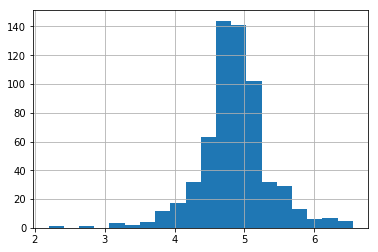

In [139]:
data["LoanAmount_Log"]=np.log(data["LoanAmount"])
data["LoanAmount_Log"].hist(bins=20)

LoanAmount is positive correlated with ApplicantIncome, sometimes Applicant have less income but the Applicant has strong support coApplicant, so it might be good idea to add Applicant and coApplicant income and take log for total_income to treat the Outliers

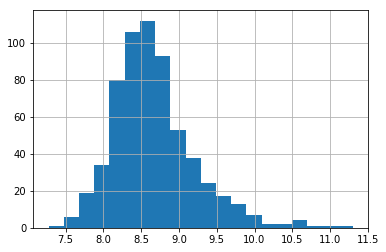

In [140]:
data["Total_Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data["Total_Income_log"]=np.log(data["Total_Income"])
data["Total_Income_log"].hist(bins=20)

# 5. Building Predictive Model

In [141]:
#Converting categorical value into numeric value
category_column=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in category_column:
    data[i]=le.fit_transform(data[i])

In [142]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,Total_Income,Total_Income_log
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,4.867534,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [143]:
data.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,Total_Income,Total_Income_log
Gender,1.000000,0.371406,0.045364,-0.000525,0.058809,0.082912,0.106096,-0.074030,0.026655,-0.025752,0.017987,0.142339,0.093191,0.167285
Married,0.371406,1.000000,0.014097,0.005826,0.049052,0.077760,0.146760,-0.095364,-0.019979,0.004415,0.089072,0.179098,0.081627,0.147938
Education,0.045364,0.014097,1.000000,-0.010383,-0.140760,-0.062290,-0.173683,-0.073928,-0.081637,-0.065243,-0.085884,-0.152593,-0.161362,-0.204861
Self_Employed,-0.000525,0.005826,-0.010383,1.000000,0.127180,-0.016100,0.120030,-0.033739,-0.004994,-0.030860,-0.003700,0.115678,0.113000,0.176709
ApplicantIncome,0.058809,0.049052,-0.140760,0.127180,1.000000,-0.116605,0.565940,-0.046531,0.006986,-0.009500,-0.004710,0.436463,0.893037,0.717829
CoapplicantIncome,0.082912,0.077760,-0.062290,-0.016100,-0.116605,1.000000,0.188128,-0.059383,-0.058795,0.010522,-0.059187,0.204967,0.342781,0.383827
LoanAmount,0.106096,0.146760,-0.173683,0.120030,0.565940,0.188128,1.000000,0.038536,-0.034541,-0.048304,-0.031618,0.895868,0.620540,0.688600
Loan_Amount_Term,-0.074030,-0.095364,-0.073928,-0.033739,-0.046531,-0.059383,0.038536,1.000000,0.002361,-0.076120,-0.022549,0.087421,-0.070917,-0.056044
Credit_History,0.026655,-0.019979,-0.081637,-0.004994,0.006986,-0.058795,-0.034541,0.002361,1.000000,-0.018761,0.432616,-0.045867,-0.020031,0.008003
Property_Area,-0.025752,0.004415,-0.065243,-0.030860,-0.009500,0.010522,-0.048304,-0.076120,-0.018761,1.000000,0.032112,-0.097396,-0.004218,-0.046246


1. Building the linear model without splitting the data into training and test set and measuring the performance.
2. Testing the model performance with different combination of independent variable and meaure the performance to check which combination of independent variable is highly associatied with outcome
3. Meauring the performance of linear and non linear model using KFold 

Step 1: Building model with logistic regression without splitting the data set and measuring the performance

In [144]:
#importing data set
X=data[['Gender', 'Married','Education',
       'Self_Employed', 'Total_Income_log', 'LoanAmount_Log',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=data["Loan_Status"]
#building Logistic Regression
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X,y)
y_predict=regressor.predict(X)
print("Accuracy",(y==y_predict).sum()/len(y))




Accuracy 0.770358306189


Lets build Logistic Regression using variable which has higher chance of getting loan:
    1. Applicantwith higher credit history
    2.Applicant having higher income and co-applicant income
    3.Applicant with higher education level
    4.Applicant buying property in developing Area
    

Step 2: Evaluation performance of model with different combination of independent features.

In [145]:
#fitting model with features highly associated with outcome
X=data[['Gender', 'Married','Education',
       'Self_Employed','Credit_History', 'Property_Area']]
y=data["Loan_Status"]
#building Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X,y)
y_predict=classifier.predict(X)
print("Accuracy",(y==y_predict).sum()/len(y))

Accuracy 0.770358306189


In [146]:
#fitting model with features highly associated with outcome
X=data[['Education','Credit_History','Property_Area','Total_Income_log']]
y=data["Loan_Status"]
#building Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression()
classifier1.fit(X,y)
y_predict=classifier1.predict(X)
print("Accuracy",(y==y_predict).sum()/len(y))

Accuracy 0.770358306189


In [147]:
#fitting model with features highly associated with outcome
X=data[['Credit_History','Total_Income_log', 'LoanAmount_Log','Education']]
y=data["Loan_Status"]
#building Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier2=LogisticRegression()
classifier2.fit(X,y)
y_predict=classifier2.predict(X)
print("Accuracy",(y==y_predict).sum()/len(y))



Accuracy 0.770358306189


Step 3: Meauring performance of Non Linear classification model using KFold

In [148]:
#Support vector classifier using rbf Kernel
#importing data set
X=data[['Education','Credit_History','Property_Area','Total_Income_log']]
y=data["Loan_Status"]
#10-fold cross-validation
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.svm import SVC
classifier_svc=SVC(kernel='rbf',random_state=0)
y_predict=cross_val_predict(classifier_svc,X,y,cv=5)
from sklearn.metrics import accuracy_score
accuracies=accuracy_score(y,y_predict)
print(accuracies)



0.770358306189


step 3: Measuring performance of linear classification model using Kfold cross validation

In [150]:
#Logistic regression model
X=data[['Education','Credit_History','Property_Area','Total_Income_log']]
y=data["Loan_Status"]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
classifier_LR=LogisticRegression()
y_predict=cross_val_predict(classifier_LR,X,y,cv=10)
from sklearn.metrics import accuracy_score
accuracies=accuracy_score(y,y_predict)
print(accuracies)

0.770358306189


Both the model gives the same result

In [151]:
#Random forest classifier model
X=data[['Education','Credit_History','Property_Area','Total_Income_log']]
y=data["Loan_Status"]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
classifier_RF=RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=0)
y_predict=cross_val_predict(classifier_RF,X,y,cv=5)
from sklearn.metrics import accuracy_score
accuracies=accuracy_score(y,y_predict)
print(accuracies)

0.690553745928


For this dataset Logistic regression classifier and SVM classifier Perform better than random Forest classifier.